In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
!pip install bert-for-tf2
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
try:
    %TensorFlow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
#import bert

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/spam_assassin.csv',encoding='iso-8859-1', names=['messages','labels', 'target'])
df.isnull().values.any()
df.shape

Mounted at /content/gdrive


(5797, 3)

In [25]:
df.head()

,messages,labels,target
0,text,target,NaN
1,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,NaN
2,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,NaN
3,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,NaN
4,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,NaN


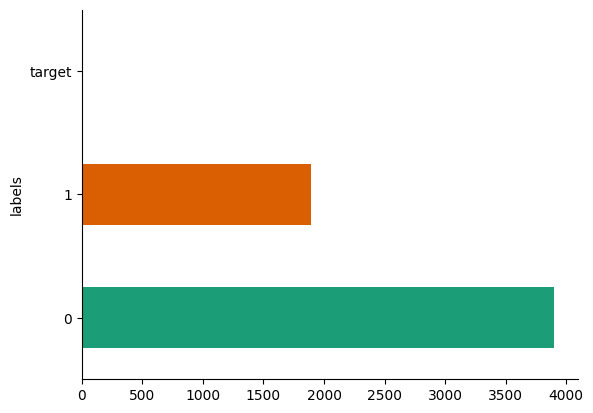

In [26]:
# @title labels

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

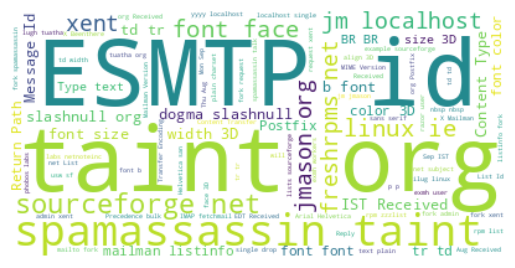

In [27]:
# prompt: print word cloud

!pip install wordcloud
from wordcloud import WordCloud
text = " ".join(message for message in df.messages)
wordcloud = WordCloud(stopwords=WordCloud().stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
!pip install bert-for-tf2
!pip install sentencepiece
!pip install bert
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

  Using cached bert-for-tf2-0.14.9.tar.gz (41 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3744 sha256=e90d1c4de6eff81733760af657b732471281a9a55f23dbd24f2fa1276b693c39
  Stored in directory: /root/.cache/pip/wheels/55/82/8d/a9bad0b8280eb858aa3dcb4e617ee5a1653fdeb239e1e8c3fe
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6780 sha256=80a6bb6eea90b59b4ef5a7eeae2028f62e6b12e7491

In [4]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
#CLean all emails
emails = []
sentences = list(df['messages'])
for sen in sentences:
    emails.append(preprocess_text(sen))

In [5]:
import numpy as np
y = df['labels']
y = np.array(list(map(lambda x: 1 if x=="1" else 0, y)))

print(emails[10])

From contractor goldenbay com cy Tue Jul Return Path Delivered To yyyy localhost netnoteinc com Received from localhost localhost by phobos labs netnoteinc com Postfix with ESMTP id BBB CC for Tue Jul EDT Received from dogma slashnull org by localhost with IMAP fetchmail for jm localhost single drop Tue Jul IST Received from mandark labs netnoteinc com by dogma slashnull org with ESMTP id NMWA for Tue Jul Received from post unedcol cefetes br by mandark labs netnoteinc com with ESMTP id NMVMp for Tue Jul Received from main gate pl by post unedcol cefetes br with SMTP Microsoft Exchange Internet Mail Service Version id K NJ Mon Jul Message Id To From Business Services Subject Qualified Potential Clients For Your Industry Date Mon Jul MIME Version Mailer Microsoft Outlook Express Content Type text html charset iso Content Transfer Encoding quoted printable Online Marketing Strategies Need More Clients Increase Your Sales Every Month Targeted mail Marketing Is Proven Method For Return Sal

#TFIDF


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

In [7]:
!pip install transformers
from transformers import BertTokenizer

# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
!pip install transformers
from transformers import BertTokenizer
import tensorflow_hub as hub

# Load the pre-trained BERT layer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)

# Load the pre-trained tokenizer (using the correct method)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example usage:
text = "This is a test sentence."
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['this', 'is', 'a', 'test', 'sentence', '.']
Token IDs: [2023, 2003, 1037, 3231, 6251, 1012]


In [9]:
tokenizer.tokenize("don't be so judgmental")  ## Below is the output
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[2123, 2102, 2022, 2061, 8689, 2389]

#Feature Reduction

___________________________________________________________________________


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

# Grey Wolf Optimization for feature selection
class GWO_FeatureSelector:
    def __init__(self, n_features, n_wolves=5, max_iter=10):
        self.n_features = n_features
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.alpha_score = float('inf')
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None

    def fitness_function(self, position, X, y):
        selected = position > 0.5
        if np.sum(selected) == 0:
            return float('inf')

        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score

        X_selected = X[:, selected]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # We want to maximize accuracy and minimize number of features
        return (1 - accuracy) + 0.1 * (np.sum(selected) / self.n_features)

    def optimize(self, X, y):
        dim = X.shape[1]
        wolves = np.random.rand(self.n_wolves, dim)
        fitness = np.array([self.fitness_function(wolf, X, y) for wolf in wolves])

        # Initialize alpha, beta, delta
        sorted_idx = np.argsort(fitness)
        self.alpha_pos = wolves[sorted_idx[0]]
        self.beta_pos = wolves[sorted_idx[1]]
        self.delta_pos = wolves[sorted_idx[2]]
        self.alpha_score = fitness[sorted_idx[0]]
        beta_score = fitness[sorted_idx[1]]
        delta_score = fitness[sorted_idx[2]]

        # Optimization loop
        for iter in range(self.max_iter):
            a = 2 - iter * (2 / self.max_iter)  # a decreases linearly from 2 to 0

            for i in range(self.n_wolves):
                for j in range(dim):
                    # Update positions
                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2

                    D_alpha = abs(C1 * self.alpha_pos[j] - wolves[i,j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2

                    D_beta = abs(C2 * self.beta_pos[j] - wolves[i,j])
                    X2 = self.beta_pos[j] - A2 * D_beta

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2

                    D_delta = abs(C3 * self.delta_pos[j] - wolves[i,j])
                    X3 = self.delta_pos[j] - A3 * D_delta

                    wolves[i,j] = (X1 + X2 + X3) / 3

                # Clip to [0,1]
                wolves[i] = np.clip(wolves[i], 0, 1)

                # Calculate new fitness
                current_fitness = self.fitness_function(wolves[i], X, y)

                # Update alpha, beta, delta
                if current_fitness < self.alpha_score:
                    self.alpha_score = current_fitness
                    self.alpha_pos = wolves[i].copy()
                elif current_fitness < beta_score:
                    beta_score = current_fitness
                    self.beta_pos = wolves[i].copy()
                elif current_fitness < delta_score:
                    delta_score = current_fitness
                    self.delta_pos = wolves[i].copy()

            if iter % 10 == 0:
                print(f'Iteration {iter}, Best Fitness: {self.alpha_score}, Features Selected: {np.sum(self.alpha_pos > 0.5)}')

        # Return selected features
        selected = self.alpha_pos > 0.5
        return selected, self.alpha_pos



In [11]:
# Apply GWO feature selection
print("\nStarting GWO Feature Selection...")
gwo_fs = GWO_FeatureSelector(n_features=X_tfidf.shape[1], n_wolves=10, max_iter=55)
selected_features, feature_weights = gwo_fs.optimize(X_tfidf, y)

# Display selected features
selected_indices = np.where(selected_features)[0]
print("\nSelected Features:")
for idx in selected_indices:
    print(f"Feature: {feature_names[idx]}, Type: Numeric, Weight: {feature_weights[idx]:.4f}")

print(f"\nTotal Features Selected: {len(selected_indices)} out of {X_tfidf.shape[1]}")



Starting GWO Feature Selection...
Iteration 0, Best Fitness: 0.0533827586206897, Features Selected: 439
Iteration 10, Best Fitness: 0.028344827586206916, Features Selected: 180
Iteration 20, Best Fitness: 0.022396551724137945, Features Selected: 155
Iteration 30, Best Fitness: 0.018096551724137946, Features Selected: 112
Iteration 40, Best Fitness: 0.017834482758620727, Features Selected: 118
Iteration 50, Best Fitness: 0.017372413793103406, Features Selected: 122

Selected Features:
Feature: access, Type: Numeric, Weight: 0.9078
Feature: account, Type: Numeric, Weight: 0.9030
Feature: agent, Type: Numeric, Weight: 0.8899
Feature: alternative, Type: Numeric, Weight: 0.5217
Feature: am, Type: Numeric, Weight: 0.5794
Feature: any, Type: Numeric, Weight: 0.5322
Feature: apply, Type: Numeric, Weight: 0.5165
Feature: are, Type: Numeric, Weight: 0.9266
Feature: article, Type: Numeric, Weight: 0.8906
Feature: august, Type: Numeric, Weight: 0.5591
Feature: back, Type: Numeric, Weight: 0.5300


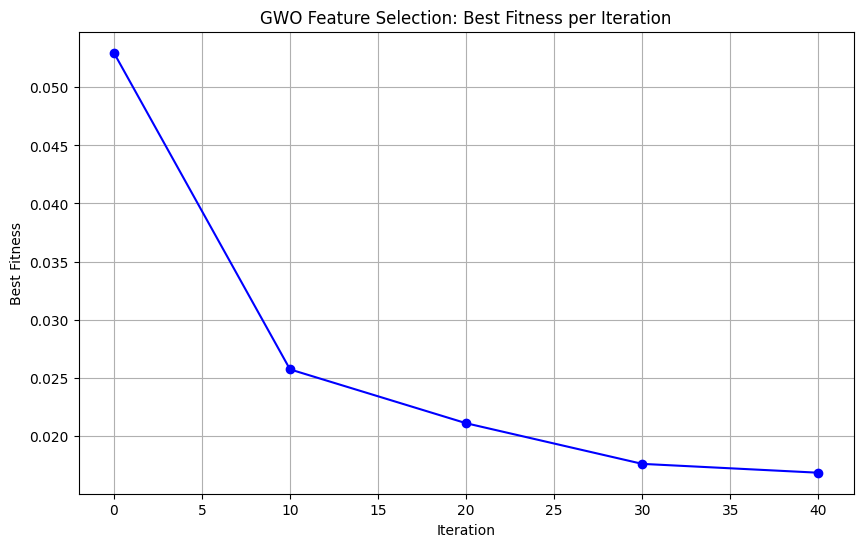

In [12]:
iterations = [0, 10, 20, 30, 40]
best_fitness_values = [0.052982758620689706, 0.02571034482758619, 0.021072413793103404, 0.017572413793103404, 0.01681034482758619]

plt.figure(figsize=(10, 6))
plt.plot(iterations, best_fitness_values, marker='o', linestyle='-', color='b')
plt.title('GWO Feature Selection: Best Fitness per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.grid(True)
plt.show()

#Create Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 128)         │        94,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,161 (547.50 KB)

 Trainable params: 140,161 (547.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.6891 - loss: 0.6599 - val_accuracy: 0.9526 - val_loss: 0.4319
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9606 - loss: 0.3063 - val_accuracy: 0.9731 - val_loss: 0.0864
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9807 - loss: 0.0662 - val_accuracy: 0.9784 - val_loss: 0.0600
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9912 - loss: 0.0376 - val_accuracy: 0.9817 - val_loss: 0.0534
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9955 - loss: 0.0215 - val_accuracy: 0.9849 - val_loss: 0.0468
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9942 - loss: 0.0194 - val_accuracy: 0.9871 - val_loss: 0.0479
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9965 - loss: 0.0142 - val_accuracy: 0.9871 - val_loss: 0.0502
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9993 - loss: 0.0076 - val_accuracy: 0.9860 - 

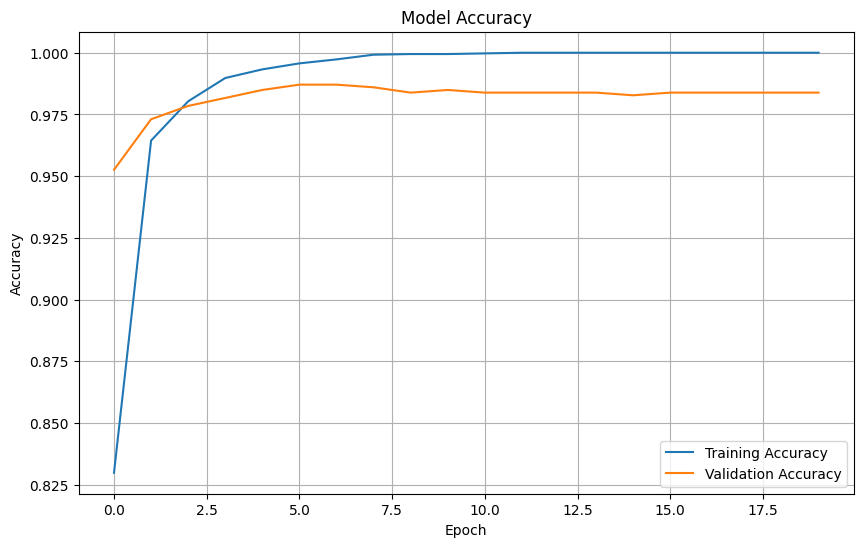

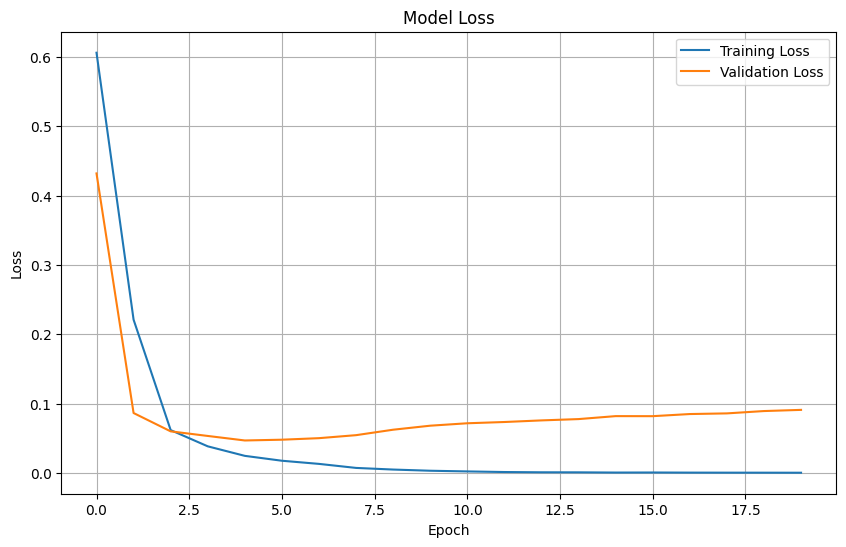

In [17]:
from sklearn.model_selection import train_test_split

X_gwo = X_tfidf[:, selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gwo, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = np.expand_dims(X_train_scaled, axis=1) # Adding a timestep dimension of 1
X_test_reshaped = np.expand_dims(X_test_scaled, axis=1)

# Define the BiLSTM model
model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=128
, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Precision: 0.9813
Recall: 0.9659
F1-score: 0.9735


In [20]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
error_rate = 1 - accuracy
tpr = tp / (tp + fn)  # Sensitivity, Recall
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)  # Specificity
fnr = fn / (fn + tp)

print(f"Confusion Matrix:\n{cm}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"True Positive Rate (TPR) / Sensitivity / Recall: {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"True Negative Rate (TNR) / Specificity: {tnr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"Standard Loss (Binary Crossentropy): {loss:.4f}") # Assuming 'loss' is the binary crossentropy loss from model evaluation

Confusion Matrix:
[[772   7]
 [ 13 368]]
True Negatives (TN): 772
False Positives (FP): 7
False Negatives (FN): 13
True Positives (TP): 368

Accuracy: 0.9828
Error Rate: 0.0172
True Positive Rate (TPR) / Sensitivity / Recall: 0.9659
False Positive Rate (FPR): 0.0090
True Negative Rate (TNR) / Specificity: 0.9910
False Negative Rate (FNR): 0.0341
Standard Loss (Binary Crossentropy): 0.1364


In [21]:
print(f"Sensitivity (Recall): {tpr:.4f}")
print(f"Specificity: {tnr:.4f}")

Sensitivity (Recall): 0.9659
Specificity: 0.9910


In [24]:
# Initial number of features
initial_features = X_tfidf.shape[1]
print(f"\nInitial number of features (after TF-IDF): {initial_features}")

# Number of features after GWO
features_after_gwo = len(selected_indices)
print(f"Number of features after GWO selection: {features_after_gwo}")

# Number of features reduced
features_reduced = initial_features - features_after_gwo
print(f"Number of features reduced by GWO: {features_reduced}")

# Percentage of features reduced
percentage_reduced = (features_reduced / initial_features) * 100 if initial_features > 0 else 0
print(f"Percentage of features reduced: {percentage_reduced:.2f}%")


Initial number of features (after TF-IDF): 1000
Number of features after GWO selection: 120
Number of features reduced by GWO: 880
Percentage of features reduced: 88.00%
